In [3]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] =(16,9)
plt.style.use('ggplot')
data = pd.read_csv('movie_metadata.csv')
print (data.shape)
print (data.head)

(5043, 28)
<bound method NDFrame.head of       color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David M

In [5]:
data['director_facebook_likes']

0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039        NaN
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64

In [4]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [15]:
newdata=data.iloc[:,4:6]
newdata.dropna(how='any', inplace=True)
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
5,475.0,530.0
...,...,...
5037,0.0,133.0
5038,2.0,318.0
5040,0.0,0.0
5041,0.0,489.0


In [8]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=5)

In [16]:
kmeans.fit(newdata)

KMeans(n_clusters=5)

In [17]:
kmeans.cluster_centers_

array([[  153.94452806,   424.19264674],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17621.21212121,   596.10606061],
       [17545.45454545, 14545.45454545]])

In [18]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[0 0 0 ... 0 0 0]
4919


In [21]:
print (type(kmeans.labels_))
unique, counts= np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 4651, 1: 104, 2: 87, 3: 66, 4: 11}


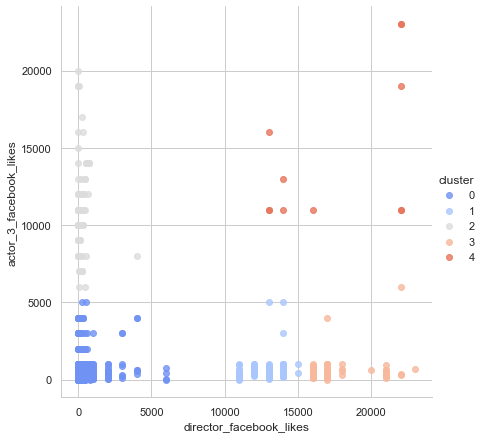

In [25]:
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='director_facebook_likes',y='actor_3_facebook_likes',data=newdata,hue='cluster',
          palette='coolwarm',height=6,aspect=1,fit_reg=False)